# Development rig

In [1]:
import sys

# setting path
sys.path.append('../')

import matplotlib.pyplot as plt
import numpy as np

from waterwaves1.wave import wave1
from waterwaves1.packing import unpack1,pack1
from waterwaves1.fourier import IEj

In [2]:
L_d=16
Hmx_d=(0.141063*L_d+0.0095721*L_d**2+0.0077829*L_d**3)/(1+0.0788340*L_d+0.0317567*L_d**2+0.0093407*L_d**3)
d=2*np.pi/L_d
N,s=50,d*(1+0.0*Hmx_d)
X=np.linspace(0,np.pi,200)

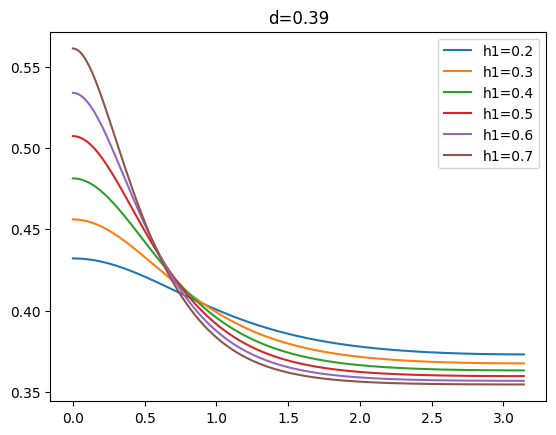

In [3]:
def plot(h):
    sol1=wave1(N,h*Hmx_d*d,d=d,scaler=s)
    Ej1,Q1,R1=unpack1(sol1.x)
    if not sol1.success:
        print(h,'fail')
    plt.plot(X,IEj([d,*Ej1],X),label=f"h1={h}")

for h in np.linspace(0.2,0.7,6):
    plot(h)
plt.legend()
plt.title(f'd={d:4.2f}')
plt.show()

h    Q      R
0.60 0.2586 0.6197
0.65 0.2606 0.6243
0.97 0.2715 0.6486


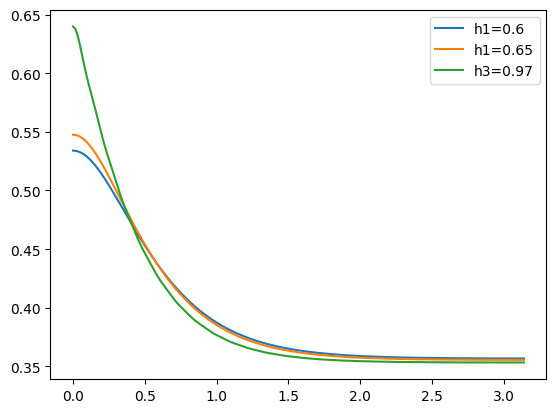

In [4]:
def step(h1,h2,h3):
    sol1=wave1(N,h1*Hmx_d*d,d=d,scaler=s)
    sol2=wave1(N,h2*Hmx_d*d,d=d,scaler=s)
    Ej1,Q1,R1=unpack1(sol1.x)
    Ej2,Q2,R2=unpack1(sol2.x)
    print(f'{h1:4.2f} {Q1:6.4f} {R1:6.4f}')
    print(f'{h2:4.2f} {Q2:6.4f} {R2:6.4f}')
    A3=((h2-h3)*sol1.x+(h3-h1)*sol2.x)/(h2-h1)
    sol3=wave1(N,h3*Hmx_d*d,d=d,scaler=s,A0=A3)
    if not sol3.success:
        print(h3,'fail step 2')    
    Ej3,Q3,R3=unpack1(sol3.x)
    print(f'{h3:4.2f} {Q3:6.4f} {R3:6.4f}')
    plt.plot(X,IEj([d,*Ej3],X),label=f"h3={h3}")

print("h    Q      R")
plot(0.6)
plot(0.65)
step(0.6,0.65,0.97)
plt.legend()
plt.show()